## P3: Classifying Sounds

In [675]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
import time
import seaborn as sns
sns.set()

# For code execution alerts
import os

In [2]:
SAMPLE_RATE = 22050

In [366]:
classes = np.array(['air_conditioner','car_horn','children_playing','dog_bark','drilling',
                    'engine_idling','gun_shot','jackhammer','siren','street_music'])

In [3]:
# Prototyping
df_iter = iter(pd.read_csv('../train.csv', chunksize=10))
df = next(df_iter)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Columns: 88201 entries, -4.662734270095825195e-02 to 5.000000000000000000e+00
dtypes: float64(88201)
memory usage: 6.7 MB


In [5]:
df.shape

(10, 88201)

## Create Spectrograms

In [444]:
# JUST SOME FOURIER TRANSFORM PARAMETERS
BINS_OCTAVE = 12*2
N_OCTAVES = 7
NUM_BINS = BINS_OCTAVE * N_OCTAVES

In [445]:
# Given a wav time series, makes a mel spectrogram
# which is a short-time fourier transform with
# frequencies on the mel (log) scale.
def mel_spec(y):
    Q = librosa.cqt(y=y, sr=SAMPLE_RATE, bins_per_octave=BINS_OCTAVE,n_bins=NUM_BINS)
    Q_db = librosa.amplitude_to_db(Q,ref=np.max)
    return Q_db

In [125]:
icl0 = 6  #Find gun shots
n_icl = 0
n_iter = 0
while n_icl == 0:
    n_iter += 1
    print('n_iter: ' , n_iter)
    df = next(df_iter)
    X_train = df.values[:,:-1]
    N_train = X_train.shape[0]
    y_train = df.values[:,-1].reshape(N_train,1).astype(int)
    icl = (y_train == icl0)
    n_icl = np.sum(icl)
print('n_icl: ', n_icl)    
# This means that the spectrograms are 168 rows (frequencies)
# By 173 columns (time frames)
song = X_train[0]
test_spec = mel_spec(song)
print(test_spec.shape)
FEATS = test_spec.shape[0]
FRAMES = test_spec.shape[1]

n_iter:  1
n_iter:  2
n_iter:  3
n_iter:  4
n_iter:  5
n_iter:  6
n_iter:  7
n_iter:  8
n_iter:  9
n_iter:  10
n_iter:  11
n_iter:  12
n_iter:  13
n_iter:  14
n_iter:  15
n_iter:  16
n_iter:  17
n_iter:  18
n_iter:  19
n_iter:  20
n_iter:  21
n_iter:  22
n_iter:  23
n_iter:  24
n_iter:  25
n_iter:  26
n_iter:  27
n_iter:  28
n_iter:  29
n_iter:  30
n_iter:  31
n_iter:  32
n_iter:  33
n_icl:  1
(168, 173)


/Applications/anaconda3/lib/python3.6/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


In [126]:
X_train = X_train[icl[:,0]]
N_train = X_train.shape[0]
y_train = y_train[icl[:,0]]

In [127]:
tmp_train = np.zeros((N_train,FEATS,FRAMES))
for i in range(N_train):
    tmp_train[i,:,:] = mel_spec(X_train[i])
#np.save('Data/xtrain_spec', tmp_train)

/Applications/anaconda3/lib/python3.6/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


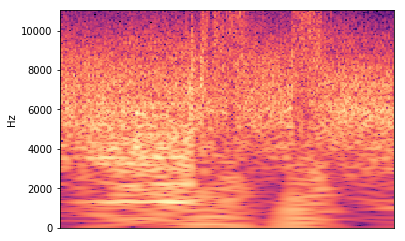

In [129]:
i=0
librosa.display.specshow(tmp_train[i], y_axis='hz')
plt.show()

In [130]:
print(cl[y_train[i,0]])
ipd.Audio(X_train[i], rate=SAMPLE_RATE)

gun_shot


In [160]:
# Spectrograms of full training set
chunksize = 500
n_chunks = 0
time0 = time.clock()
for df in pd.read_csv('../train.csv.gz', chunksize=chunksize):
    n_chunks += 1
    print('Chunk #',n_chunks,':')
    X_train0 = df.values[:,:-1]
    y_train0 = df.values[:,-1].reshape(-1,1).astype(int)
    X_train1 = np.array([mel_spec(X_train0_) for X_train0_ in X_train0])
    X_train = X_train1 if n_chunks==1 else np.vstack((X_train, X_train1))
    y_train = y_train0 if n_chunks==1 else np.vstack((y_train, y_train0))
    print('   So far: {} samples, {:.2f} min'.format(X_train.shape[0], (time.clock()-time0)/60))
print('DONE with training dataset', X_train.shape, y_train.shape)
N_train = X_train.shape[0]
del df, X_train0, y_train0, X_train1

Chunk # 1 :


/Applications/anaconda3/lib/python3.6/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


   So far: 500 samples, 2.89 min
Chunk # 2 :
   So far: 1000 samples, 5.79 min
Chunk # 3 :
   So far: 1500 samples, 8.68 min
Chunk # 4 :
   So far: 2000 samples, 11.52 min
Chunk # 5 :
   So far: 2500 samples, 14.44 min
Chunk # 6 :
   So far: 3000 samples, 17.35 min
Chunk # 7 :
   So far: 3500 samples, 20.29 min
Chunk # 8 :
   So far: 4000 samples, 23.15 min
Chunk # 9 :
   So far: 4500 samples, 26.07 min
Chunk # 10 :
   So far: 5000 samples, 28.92 min
Chunk # 11 :
   So far: 5500 samples, 31.79 min
Chunk # 12 :
   So far: 6000 samples, 34.87 min
Chunk # 13 :
   So far: 6324 samples, 36.78 min
DONE with training dataset (6324, 168, 173) (6324, 1)


In [158]:
# Spectrograms of full test set
chunksize = 200
n_chunks = 0
time0 = time.clock()
for df in pd.read_csv('../test.csv.gz', header=None, index_col=0, chunksize=chunksize):
    n_chunks += 1
    print('Chunk #',n_chunks,':')
    X_test0 = df.values
    id_test0 = df.index.values.reshape(-1,1).astype(int)
    X_test1 = np.array([mel_spec(X_test0_) for X_test0_ in X_test0])
    X_test = X_test1 if n_chunks==1 else np.vstack((X_test, X_test1))
    id_test = id_test0 if n_chunks==1 else np.vstack((id_test, id_test0))
    print('   So far: {} samples, {:.2f} min'.format(X_test.shape[0], (time.clock()-time0)/60))
print('DONE with test dataset', X_test.shape, id_test.shape)
del df, X_test0, id_test0, X_test1

Chunk # 1 :


/Applications/anaconda3/lib/python3.6/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


   So far: 200 samples, 1.09 min
Chunk # 2 :
   So far: 400 samples, 2.22 min
Chunk # 3 :
   So far: 600 samples, 3.31 min
Chunk # 4 :
   So far: 800 samples, 4.41 min
Chunk # 5 :
   So far: 1000 samples, 5.51 min
DONE with test dataset (1000, 168, 173) (1000, 1)


## Mel Frequency Cepstral Coefficients (MFCCs)

30
(168, 173)
siren


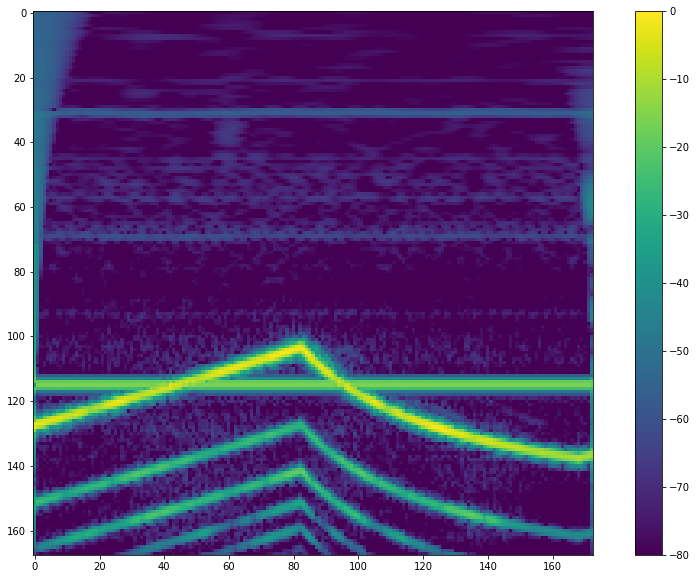

In [370]:
i=(cl[y_train[:,0]] == 'siren').nonzero()[0][3]
print(i)
print(X_train[i].shape)
print(cl[y_train[i,0]])
plt.figure(figsize=(15,10))
plt.imshow(X_train[i])
plt.colorbar()
plt.show()

(12, 173)


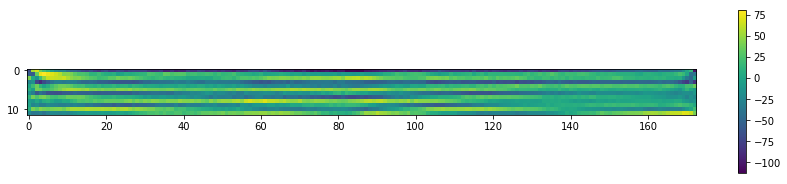

In [371]:
mfcc = librosa.feature.mfcc(S=X_train[i],n_mfcc=20)[1:13]
print(mfcc.shape)
plt.figure(figsize=(15,3))
plt.imshow(mfcc)
plt.colorbar()
plt.show()

(12, 173)


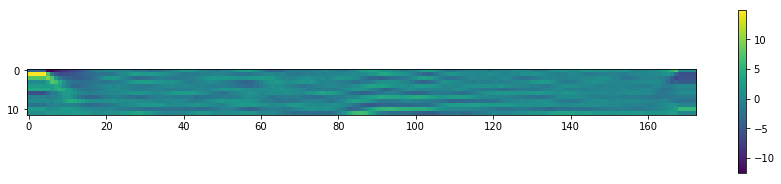

In [372]:
mfcc_delta = librosa.feature.delta(mfcc, width=9, order=1)  # Try different widths
print(mfcc_delta.shape)
plt.figure(figsize=(15,3))
plt.imshow(mfcc_delta)
plt.colorbar()
plt.show()

(12, 173)


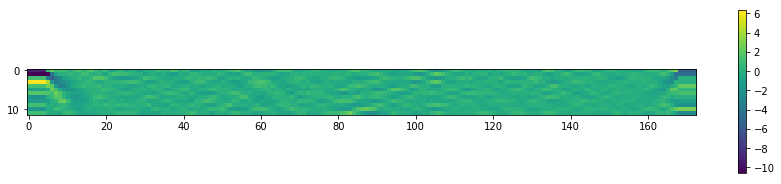

In [373]:
mfcc_delta2 = librosa.feature.delta(mfcc, width=9, order=2) # Try different widths
print(mfcc_delta2.shape)
plt.figure(figsize=(15,3))
plt.imshow(mfcc_delta2)
plt.colorbar()
plt.show()

In [310]:
# MFCCs, delta and delta-delta for whole training set
n_mfcc = 20
X_train_mfcc = np.array([librosa.feature.mfcc(S=X_train0,n_mfcc=n_mfcc)[1:] for X_train0 in X_train])
X_train_mfcc_delta  = np.array([librosa.feature.delta(X_train_mfcc0,width=9,order=1) for X_train_mfcc0 in X_train_mfcc])
X_train_mfcc_delta2 = np.array([librosa.feature.delta(X_train_mfcc0,width=9,order=2) for X_train_mfcc0 in X_train_mfcc])
print(X_train_mfcc.shape, X_train_mfcc_delta.shape, X_train_mfcc_delta2.shape)

(6324, 19, 173) (6324, 19, 173) (6324, 19, 173)


In [311]:
X_train1 = np.hstack((X_train_mfcc,X_train_mfcc_delta,X_train_mfcc_delta2))
del X_train_mfcc, X_train_mfcc_delta, X_train_mfcc_delta2
print(X_train1.shape)

(6324, 57, 173)


In [312]:
# MFCCs, delta and delta-delta for whole test set
X_test_mfcc = np.array([librosa.feature.mfcc(S=X_test0,n_mfcc=n_mfcc)[1:] for X_test0 in X_test])
X_test_mfcc_delta  = np.array([librosa.feature.delta(X_test_mfcc0,width=9,order=1) for X_test_mfcc0 in X_test_mfcc])
X_test_mfcc_delta2 = np.array([librosa.feature.delta(X_test_mfcc0,width=9,order=2) for X_test_mfcc0 in X_test_mfcc])
print(X_test_mfcc.shape, X_test_mfcc_delta.shape, X_test_mfcc_delta2.shape)

(1000, 19, 173) (1000, 19, 173) (1000, 19, 173)


In [313]:
X_test1 = np.hstack((X_test_mfcc,X_test_mfcc_delta,X_test_mfcc_delta2))
del X_test_mfcc, X_test_mfcc_delta, X_test_mfcc_delta2
print(X_test1.shape)

(1000, 57, 173)


In [314]:
# Flatten arrays
X_train1 = np.array([X_train0.flatten() for X_train0 in X_train1])
X_test1  = np.array([X_test0.flatten()  for X_test0  in X_test1])
print(X_train1.shape, X_test1.shape)

(6324, 9861) (1000, 9861)


In [81]:
# Transform y_train into 1-hot array
Y_train = np.zeros((N_train,10),dtype=int)
Y_train[np.arange(N_train),y_train[:,0]] = 1

NameError: name 'N_train' is not defined

## Implement Neural Network

In [279]:
# Import deep learning modules from keras library
from keras.layers import Dense # For dense layers
from keras.models import Sequential # For sequential layering
from keras.callbacks import EarlyStopping # For stopping execution
from sklearn.metrics import mean_squared_error

/Applications/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [316]:
# Function to train multi-layered neural network of a given number of nodes
def train_model_DL(X_train,Y_train,n_nodes,n_output=1):
    """ n_nodes is 1-D numpy array with number of nodes on each layer
        e.g. [10,20,30] is a model with 3 (hidden) layers,
        with 10/20/30 nodes on the first/second/third layers
        Returns trained DL model """
    input_shape = (X_train.shape[1],) # Shape of input data
    # Initialize model
    model_DL = Sequential()
    for i in range(len(n_nodes)):
        if i == 0:
            # First layer
            model_DL.add(Dense(n_nodes[i],activation='relu',input_shape=input_shape))
        else:
            # Subsequent layers
            model_DL.add(Dense(n_nodes[i],activation='relu'))
    # Output layer
    model_DL.add(Dense(n_output))
    # Compile model
    model_DL.compile(optimizer='adam',loss='mean_squared_error')
    # Print model summary
    model_DL.summary()
    # Early stopping monitor w/ patience=3 (stop after 3 runs without improvements)
    early_stopping_monitor = EarlyStopping(patience=10)
    # Fit model using 20% of data for validation
    model_DL.fit(X_train, Y_train, validation_split=0.2, epochs=30, callbacks=[early_stopping_monitor])
    Y_train_DLpred = model_DL.predict(X_train)
    mse_DL = mean_squared_error(Y_train, Y_train_DLpred)
    print('DONE. Mean Squared Error: ', mse_DL)
    return model_DL

In [317]:
n_nodes = np.array([10])
model_DL = train_model_DL(X_train1,Y_train,n_nodes,n_output=10)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 10)                98620     
_________________________________________________________________
dense_18 (Dense)             (None, 10)                110       
Total params: 98,730
Trainable params: 98,730
Non-trainable params: 0
_________________________________________________________________
Train on 5059 samples, validate on 1265 samples
Epoch 1/30
5059/5059 [==============================] - 1s 220us/step - loss: 17.6155 - val_loss: 6.6323
Epoch 2/30
5059/5059 [==============================] - 1s 156us/step - loss: 9.6474 - val_loss: 10.5096
Epoch 3/30
5059/5059 [==============================] - 1s 151us/step - loss: 9.8513 - val_loss: 9.3270
Epoch 4/30
5059/5059 [==============================] - 1s 156us/step - loss: 6.3847 - val_loss: 6.1781
Epoch 5/30
5059/5059 [==============================] - 1s 155us/ste

In [98]:
def write_to_file(filename, ids, predictions):
    # Function to write predictions to CSV file
    with open(filename, "w") as f:
        f.write("Id,Prediction\n")
        for i,p in enumerate(predictions):
            f.write(str(ids[i]) + "," + str(p) + "\n")

In [318]:
Y_test_pred  = [np.argmax(Y_test_pred0) for Y_test_pred0 in model_DL.predict(X_test1)]
write_to_file("P3_Antonio_pred_v2.csv", id_test[:,0], Y_test_pred)

## Full feature set

In [55]:
def get_features(X, sample_rate=SAMPLE_RATE):
    '''
    Functions to extract features from array of amplitudes
    '''
    stft = np.abs(librosa.stft(X)) # Short-time Fourier Transform
    mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40)
    mfcc_delta  = librosa.feature.delta(mfcc, width=9, order=1)
    mfcc_delta2 = librosa.feature.delta(mfcc, width=9, order=2)
    chroma = librosa.feature.chroma_stft(S=stft, sr=sample_rate)
    mel = librosa.feature.melspectrogram(X, sr=sample_rate)
    contrast = librosa.feature.spectral_contrast(S=stft, sr=sample_rate)
    tonnetz = librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate)
    return mfcc, mfcc_delta, mfcc_delta2, chroma, mel, contrast, tonnetz

def get_feature_set(file, sample_rate=SAMPLE_RATE, training_set=True):
    '''
    Get full feature set from file
    '''
    print('File: ', file)
    chunksize = 100
    n_chunks = 0
    time0 = time.clock()
    ids, labels, mfcc, mfcc_delta, mfcc_delta2 = None, None, None, None, None
    chroma, mel, contrast, tonnetz = None, None, None, None
    for df in pd.read_csv(file, header=None, index_col=(None if training_set else 0), chunksize=chunksize):
        n_chunks += 1
        print('Chunk #',n_chunks,':')
        if training_set:
            X = df.values[:,:-1]
            labels0 = df.values[:,-1].reshape(-1,1).astype(int)
            labels = labels0 if n_chunks==1 else np.vstack((labels, labels0))
        else:
            X = df.values
            ids0 = df.index.values.reshape(-1,1).astype(int)
            ids = ids0 if n_chunks==1 else np.vstack((ids, ids0))
        for X0 in X:
            mfcc0, mfcc_delta0, mfcc_delta20, chroma0, mel0, contrast0, tonnetz0 = get_features(X0, sample_rate=SAMPLE_RATE)
            mfcc = [mfcc0] if mfcc is None else np.vstack((mfcc, [mfcc0]))
            mfcc_delta  = [mfcc_delta0]  if mfcc_delta  is None else np.vstack((mfcc_delta,  [mfcc_delta0]))
            mfcc_delta2 = [mfcc_delta20] if mfcc_delta2 is None else np.vstack((mfcc_delta2, [mfcc_delta20]))
            chroma = [chroma0] if chroma is None else np.vstack((chroma, [chroma0]))
            mel = [mel0] if mel is None else np.vstack((mel, [mel0]))
            contrast = [contrast0] if contrast is None else np.vstack((contrast, [contrast0]))
            tonnetz = [tonnetz0] if tonnetz is None else np.vstack((tonnetz, [tonnetz0]))
        print('   So far: {} samples, {:.2f} min'.format(len(mfcc), (time.clock()-time0)/60))
    print('DONE with full feature set for file', file)
    return ids, labels, mfcc, mfcc_delta, mfcc_delta2, chroma, mel, contrast, tonnetz

In [56]:
# Training set
_, y_train, X_train_mfcc, X_train_mfcc_delta, X_train_mfcc_delta2, X_train_chroma, X_train_mel, X_train_contrast, X_train_tonnetz = get_feature_set('../train.csv.gz', sample_rate=SAMPLE_RATE, training_set=True)

File:  ../train.csv.gz
Chunk # 1 :


/Applications/anaconda3/lib/python3.6/site-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


   So far: 100 samples, 1.01 min
Chunk # 2 :
   So far: 200 samples, 2.09 min
Chunk # 3 :
   So far: 300 samples, 3.18 min
Chunk # 4 :
   So far: 400 samples, 4.33 min
Chunk # 5 :
   So far: 500 samples, 5.59 min
Chunk # 6 :
   So far: 600 samples, 6.90 min
Chunk # 7 :
   So far: 700 samples, 8.27 min
Chunk # 8 :
   So far: 800 samples, 9.70 min
Chunk # 9 :
   So far: 900 samples, 11.15 min
Chunk # 10 :
   So far: 1000 samples, 12.63 min
Chunk # 11 :
   So far: 1100 samples, 14.11 min
Chunk # 12 :
   So far: 1200 samples, 15.73 min
Chunk # 13 :
   So far: 1300 samples, 17.41 min
Chunk # 14 :
   So far: 1400 samples, 19.16 min
Chunk # 15 :
   So far: 1500 samples, 20.97 min
Chunk # 16 :
   So far: 1600 samples, 22.89 min
Chunk # 17 :
   So far: 1700 samples, 24.81 min
Chunk # 18 :
   So far: 1800 samples, 26.79 min
Chunk # 19 :
   So far: 1900 samples, 28.83 min
Chunk # 20 :
   So far: 2000 samples, 30.93 min
Chunk # 21 :
   So far: 2100 samples, 33.08 min
Chunk # 22 :
   So far: 2200 s

In [88]:
# Test set
X_test_ids, _, X_test_mfcc, X_test_mfcc_delta, X_test_mfcc_delta2, X_test_chroma, X_test_mel, X_test_contrast, X_test_tonnetz = get_feature_set('../test.csv.gz', sample_rate=SAMPLE_RATE, training_set=False)

File:  ../test.csv.gz
Chunk # 1 :


/Applications/anaconda3/lib/python3.6/site-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


   So far: 100 samples, 0.97 min
Chunk # 2 :
   So far: 200 samples, 1.96 min
Chunk # 3 :
   So far: 300 samples, 3.00 min
Chunk # 4 :
   So far: 400 samples, 4.14 min
Chunk # 5 :
   So far: 500 samples, 5.30 min
Chunk # 6 :
   So far: 600 samples, 6.49 min
Chunk # 7 :
   So far: 700 samples, 7.76 min
Chunk # 8 :
   So far: 800 samples, 9.07 min
Chunk # 9 :
   So far: 900 samples, 10.45 min
Chunk # 10 :
   So far: 1000 samples, 11.84 min
DONE with full feature set for file ../test.csv.gz


In [334]:
get_t_avg = lambda X: np.array([np.mean(X0,axis=1) for X0 in X])
get_t_std = lambda X: np.array([np.std(X0,axis=1)  for X0 in X])
X_train2 = np.hstack((get_t_avg(X_train_mfcc), get_t_avg(X_train_mfcc_delta),
                     get_t_avg(X_train_mfcc_delta2),
                     get_t_avg(X_train_chroma), get_t_avg(X_train_mel),
                     get_t_avg(X_train_contrast), get_t_avg(X_train_tonnetz)))
X_test2 = np.hstack((get_t_avg(X_test_mfcc), get_t_avg(X_test_mfcc_delta),
                    get_t_avg(X_test_mfcc_delta2),
                    get_t_avg(X_test_chroma), get_t_avg(X_test_mel),
                    get_t_avg(X_test_contrast), get_t_avg(X_test_tonnetz)))
print(X_train2.shape, X_test2.shape)
X_scl = scale(np.vstack((X_train2,X_test2)))
X_train2, X_test2 = X_scl[:N_train], X_scl[N_train:]
del X_scl

(6325, 273) (1000, 273)


In [82]:
# Transform y_train into 1-hot array
N_train = X_train2.shape[0]
Y_train = np.zeros((N_train,10),dtype=int)
Y_train[np.arange(N_train),y_train[:,0]] = 1

## KNN Classifier

In [137]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale

In [92]:
knn = KNeighborsClassifier()
knn.fit(X_train2, Y_train)
print('Score: ', knn.score(X_train2, Y_train))

Score:  0.9650592885375494


In [91]:
X_train3, X_holdout3, Y_train3, Y_holdout3 = train_test_split(X_train2, Y_train, test_size=0.2, 
                                                              random_state=1, stratify=Y_train)
knn3 = KNeighborsClassifier()
knn3.fit(X_train3, Y_train3)
print('Score: ', knn.score(X_holdout3, Y_holdout3))

Score:  0.9620553359683794


In [99]:
Y_test_pred2 = [np.argmax(Y_test_pred0) for Y_test_pred0 in knn.predict(X_test2)]
write_to_file("P3_Antonio_pred_v3.csv", X_test_ids[:,0], Y_test_pred2)

In [762]:
X_train2 = np.hstack((get_t_avg(X_train_mfcc), #2*get_t_std(X_train_mfcc),
                      #get_t_avg(X_train_mfcc_delta),
                      #get_t_avg(X_train_mfcc_delta2), 
                      get_t_avg(X_train_chroma), get_t_avg(X_train_mel[:,:40]),
                      get_t_avg(X_train_contrast), get_t_avg(X_train_tonnetz)))
X_test2 = np.hstack((get_t_avg(X_test_mfcc), #2*get_t_std(X_test_mfcc),
                     #get_t_avg(X_test_mfcc_delta),
                     #get_t_avg(X_test_mfcc_delta2), 
                     get_t_avg(X_test_chroma), get_t_avg(X_test_mel[:,:40]),
                     get_t_avg(X_test_contrast), get_t_avg(X_test_tonnetz)))
X_scl = scale(np.vstack((X_train2,X_test2)))
X_train2, X_test2 = X_scl[:N_train], X_scl[N_train:]
del X_scl
X_train2_, X_holdout2, Y_train2_, Y_holdout2 = train_test_split(X_train2, Y_train, test_size=0.2, 
                                                              random_state=42, stratify=Y_train)
print(X_train2.shape, X_test2.shape)
knn2 = KNeighborsClassifier(n_neighbors=1)
cv_scores = cross_val_score(knn2, X_train2_, Y_train2_, cv=5)#, scoring='roc_auc')
print(cv_scores, np.mean(cv_scores))
knn2.fit(X_train2_, Y_train2_)
print('Score: ', knn2.score(X_train2_, Y_train2_))
print('Holdout score: ', knn2.score(X_holdout2, Y_holdout2))

(6325, 105) (1000, 105)
[0.99209486 0.98715415 0.98715415 0.9812253  0.99011858] 0.9875494071146245
Score:  1.0
Holdout score:  0.991304347826087


In [151]:
Y_test_pred2 = [np.argmax(Y_test_pred0) for Y_test_pred0 in knn2.predict(X_test2)]
write_to_file("P3_Antonio_pred_v5.csv", X_test_ids[:,0], Y_test_pred2)

## Random Forest

In [523]:
from sklearn.ensemble import RandomForestClassifier

In [763]:
# Evaluate current feature set by 5-fold CV
rf = RandomForestClassifier(class_weight="balanced", n_jobs=-1,
                            n_estimators=1000, max_features='sqrt')
cv_scores = cross_val_score(rf, X_train2_, Y_train2_, cv=5)
print('CV scores: ', cv_scores, 'Mean: {:.4f}'.format(np.mean(cv_scores)))
rf.fit(X_train2_, Y_train2_)
print('Holdout set score: ', rf.score(X_holdout2, Y_holdout2))

CV scores:  [0.96640316 0.96245059 0.95750988 0.95355731 0.95454545] Mean: 0.9589
Holdout set score:  0.9675889328063241


(105,)


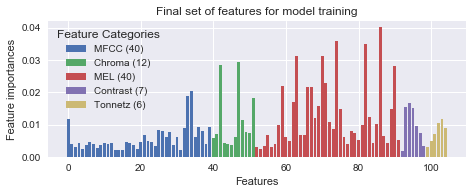

In [766]:
# Fit entire training dataset and plot feature importances
rf.fit(X_train2, Y_train)
n_feat = np.array([X_train_mfcc.shape[1], #X_train_mfcc.shape[1], 
                   #X_train_mfcc_delta.shape[1], X_train_mfcc_delta2.shape[1], 
                   X_train_chroma.shape[1], X_train_mel[:,:40].shape[1], 
                   X_train_contrast.shape[1], X_train_tonnetz.shape[1]])
feat_name = np.array(['MFCC', #r'MFCC-$\sigma$', r'MFCC-$\Delta$', r'MFCC-$\Delta^2$',
                      'Chroma', 'MEL', 'Contrast', 'Tonnetz'])
imp = rf.feature_importances_
print(imp.shape)
plt.clf()
plt.figure(figsize=(7.5,2.5))
#plt.figure(figsize=(5.5,2.5))
i0 = 0
for ifeat,n_feat0 in enumerate(n_feat):
    plt.bar(i0+np.arange(n_feat0), imp[i0:i0+n_feat0], label=feat_name[ifeat]+' ({})'.format(n_feat0))
    i0 += n_feat0
plt.title('Final set of features for model training')
#plt.title('Initial set of features')
plt.xlabel('Features')
plt.ylabel('Feature importances')
plt.legend(title='Feature Categories') #, loc=(1,0))
plt.savefig('../P3_fig_feature_importances.pdf',bbox_inches='tight')
plt.show()

## SVM Classifier

In [184]:
from sklearn.svm import SVC

In [277]:
print(X_train2_.shape, X_holdout2.shape)
svc2 = SVC(C=10)
cv_scores = cross_val_score(svc2, X_train2_, Y_train2_.argmax(axis=1), cv=5) #scoring='roc_auc')
print(cv_scores, np.mean(cv_scores))
svc2.fit(X_train2_, Y_train2_.argmax(axis=1))
print('Train-Holdout Score: ', svc2.score(X_train2_, Y_train2_.argmax(axis=1)))
print('Holdout score: ', svc2.score(X_holdout2, Y_holdout2.argmax(axis=1)))
svc2.fit(X_train2, Y_train.argmax(axis=1))
print('Train Score: ', svc2.score(X_train2, Y_train.argmax(axis=1)))

(5060, 53) (1265, 53)
[0.98818898 0.99506903 0.99109792 0.9950544  0.99007937] 0.9918979398838292
Train-Holdout Score:  1.0
Holdout score:  0.991304347826087
Train Score:  1.0


In [266]:
Y_test_pred2 = svc2.predict(X_test2)
write_to_file("P3_Antonio_pred_v6.csv", X_test_ids[:,0], Y_test_pred2)

## Semi-Supervised

In [605]:
from sklearn.semi_supervised import LabelSpreading
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold

In [356]:
# Test Label Spreading by cross validation
skf = StratifiedKFold(n_splits=5)
score0 = []
score0_holdout = []
score1 = []
score1_holdout = []
for i_train, i_test in skf.split(X_train2_, Y_train2_.argmax(axis=1)):
    X_train3,   y_train3   = X_train2_[i_train], Y_train2_[i_train].argmax(axis=1)
    X_holdout3, y_holdout3 = X_train2_[i_test],  Y_train2_[i_test].argmax(axis=1)
    n_holdout3 = len(y_holdout3)
    ls0 = LabelSpreading(kernel='rbf', gamma=2, n_neighbors=4)
    ls0.fit(X_train3, y_train3)
    score0.append(ls0.score(X_holdout3, y_holdout3))
    score0_holdout.append(ls0.score(X_holdout2, Y_holdout2.argmax(axis=1)))
    print('   Supervised score: {:.4f} (holdout {:.4f})'.format(score0[-1],score0_holdout[-1]))
    ls1 = LabelSpreading(kernel='rbf', gamma=2, n_neighbors=4)
    ls1.fit(np.vstack((X_train3,X_holdout3)), np.concatenate((y_train3,np.full(n_holdout3,-1))))
    score1.append(ls1.score(X_holdout3, y_holdout3))
    score1_holdout.append(ls1.score(X_holdout2, Y_holdout2.argmax(axis=1)))
    print('   Semi-Supervised score: {:.4f} (holdout {:.4f})'.format(score1[-1],score1_holdout[-1]))
print('Mean supervised: {:.4f} (holdout {:.4f})'.format(np.mean(score0),np.mean(score0_holdout)))
print('Mean semi-supervised: {:.4f} (holdout {:.4f})'.format(np.mean(score1),np.mean(score1_holdout)))

   Supervised score: 0.9941 (holdout 0.9913)
   Semi-Supervised score: 0.9961 (holdout 0.9929)
   Supervised score: 0.9941 (holdout 0.9929)
   Semi-Supervised score: 0.9931 (holdout 0.9913)
   Supervised score: 0.9921 (holdout 0.9929)
   Semi-Supervised score: 0.9921 (holdout 0.9905)
   Supervised score: 0.9871 (holdout 0.9897)
   Semi-Supervised score: 0.9901 (holdout 0.9897)
   Supervised score: 0.9921 (holdout 0.9866)
   Semi-Supervised score: 0.9921 (holdout 0.9905)
Mean supervised: 0.9919 (holdout 0.9907)
Mean semi-supervised: 0.9927 (holdout 0.9910)


In [353]:
# Semi-supervised on test set
ls = LabelSpreading(kernel='rbf', gamma=2, n_neighbors=4)
ls.fit(np.vstack((X_train2,X_test2)), 
       np.concatenate((Y_train.argmax(axis=1),np.full(X_test2.shape[0],-1))))
print('Semi-Supervised score: {:.4f}'.format(ls.score(X_train2, Y_train.argmax(axis=1))))

Semi-Supervised score: 1.0000


In [354]:
Y_test_pred2 = ls.predict(X_test2)
write_to_file("P3_Antonio_pred_v8.csv", X_test_ids[:,0], Y_test_pred2)

## Sequential

In [667]:
from sklearn.semi_supervised import LabelSpreading
from sklearn.model_selection import RepeatedStratifiedKFold

def sequential_clf(X_train, y_train, X_test, semi_sup=False,
                   classifier=LabelSpreading, 
                   **kwargs):
    '''
    Classify sequentially by class
    '''
    classes =np.array(['air_conditioner','car_horn','children_playing','dog_bark','drilling',
                       'engine_idling','gun_shot','jackhammer','siren','street_music'])
    n_splits = 5  # No. of K-folds for cross-validation
    n_repeats = 3 # No. of cross-validation repeats
    n_train = X_train.shape[0]
    n_test  = X_test.shape[0]
    assert(len(y_train) == n_train)
    n_classes = len(classes)
    iclasses, class_cts = np.unique(y_train, return_counts=True)
    assert(np.sum(np.equal(iclasses, np.arange(n_classes))) == n_classes)
    Y_train = np.zeros((n_train, n_classes), dtype=bool)
    Y_train[np.arange(n_train), y_train] = True
    y_test_pred = np.full(n_test, -1)
    ih = np.arange(n_test)
    for i in range(n_classes-1):
        print('{}) {} classes:'.format(i+1, len(iclasses)))
        # Fit classifier on current classes
        clf = classifier(**kwargs)
        Y_train_ = Y_train[:,iclasses]
        ix = (np.sum(Y_train_,axis=1) > 0).nonzero()[0]
        # Score classes
        score_cl = []
        rskf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, 
                                       random_state=42)
        for i_train0, i_val0 in rskf.split(X_train[ix], Y_train_[ix].argmax(axis=1)):
            i_train = ix[i_train0]
            i_val   = ix[i_val0]
            X_train_, y_train_ = X_train[i_train], Y_train_[i_train].argmax(axis=1)
            X_val_,   y_val_   = X_train[i_val],   Y_train_[i_val].argmax(axis=1)
            n_val_ = len(i_val0)
            # Semi-supervised vs. Supervised fitting
            if semi_sup:
                clf.fit(np.vstack((X_train_,X_val_)),
                        np.concatenate((y_train_,np.full(n_val_,-1))))
            else:
                clf.fit(X_train_, y_train_)
            score_cl0 = [clf.score(X_val_[y_val_==icl],
                                   y_val_[y_val_==icl]) for icl in range(len(iclasses))]
            score_cl0 = np.append(score_cl0, clf.score(X_val_, y_val_))
            score_cl.append(score_cl0)
        score_cl = np.array(score_cl)
        score_cl_std = 100*np.std(score_cl,axis=0)/np.mean(score_cl,axis=0)
        score_cl = np.mean(score_cl, axis=0)
        for icl in range(len(iclasses)):
            print('   Class {:16s} ({:4d} cts): {:.4f} ± {:.2f}%'.format(classes[icl], class_cts[icl],
                                                               score_cl[icl], score_cl_std[icl]))
        print('   Overall CV score ({}x {}-fold): {:.4f} ± {:.2f}%'.format(n_repeats, n_splits, 
                                                                           score_cl[-1], score_cl_std[-1]))
        # Select best class
        icl = np.argsort(class_cts)
        imax = icl[np.argmax(score_cl[icl])]
        score_imax = score_cl[imax]
        # Repeat cross-validation for one-vs-rest
        y_train0 = np.zeros(len(ix), dtype=int)
        y_train0[y_train[ix] == iclasses[imax]] = 1
        score_imax_ovr = []
        rskf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, 
                                       random_state=42)
        for i_train, i_val in rskf.split(X_train[ix], y_train0):
            X_train_, y_train_ = X_train[ix[i_train]], y_train0[i_train]
            X_val_,   y_val_   = X_train[ix[i_val]],   y_train0[i_val]
            n_val_ = len(i_val)
            if semi_sup:
                clf.fit(np.vstack((X_train_,X_val_)), 
                        np.concatenate((y_train_,np.full(n_val_,-1))))
            else:
                clf.fit(X_train_, y_train_)
            score_imax_ovr.append(clf.score(X_val_[y_val_==1], y_val_[y_val_==1]))
        score_imax_ovr = np.mean(score_imax_ovr)
        # Make predictions for best class in one-vs-rest fashion
        X_train_ = np.vstack((X_train[ix], X_test[ih]))
        y_train_ = np.zeros(len(ix), dtype=int)
        y_train_[y_train[ix] == iclasses[imax]] = 1
        y_train_ = np.append(y_train_, np.full(len(ih),-1))
        clf.fit(X_train_, y_train_)
        y_test_pred_ = clf.predict(X_test[ih])
        y_test_pred[ih[y_test_pred_==1]] = iclasses[imax]
        ih = ih[y_test_pred_ != 1]
        print('     Best class: {:10s} ({:3d} files, {:.3f}% of training data)'.format(classes[imax],
                class_cts[imax], 100*class_cts[imax]/n_train))
        print('        CV Score (3x 5-fold): {:.4f} ({:.4f} one-vs-rest)'.format(score_imax, score_imax_ovr))
        print('        Classified test files: {}, {:.3f}% of test data'.format(np.sum(y_test_pred_==1),
                100*np.sum(y_test_pred_==1)/n_test))
        classes = np.delete(classes, imax)
        iclasses = np.delete(iclasses, imax)
        class_cts = np.delete(class_cts, imax)
        if i == n_classes-2:
            y_test_pred[ih] = iclasses[0]
            print('     Remaining class: {:10s} ({:3d} files, {:.3f}% of training data)'.format(classes[0],
                class_cts[0], 100*class_cts[0]/n_train))
            print('        Classified test files: {}, {:.3f}% of test data'.format(len(ih),
                100*len(ih)/n_test))
    return y_test_pred

In [686]:
y_test_pred = sequential_clf(X_train2, Y_train.argmax(axis=1), X_test2, semi_sup=True,
                             classifier=LabelSpreading,
                             #LabelSpreading params
                             kernel='knn', 
                             gamma=2,       # Only for kernel='rbf'
                             n_neighbors=5, # Only for kernel='knn'
                             alpha=0.001) # Clamping factor (0-1, 0=don't change init. labels)
os.system('say "DONE"')

1) 10 classes:
   Class air_conditioner  (1761 cts): 0.9977 ± 0.19%
   Class car_horn         ( 149 cts): 0.9752 ± 3.47%
   Class children_playing ( 714 cts): 0.9930 ± 1.00%
   Class dog_bark         ( 492 cts): 0.9621 ± 1.46%
   Class drilling         ( 596 cts): 0.9732 ± 1.38%
   Class engine_idling    ( 695 cts): 0.9861 ± 0.78%
   Class gun_shot         (  13 cts): 0.9333 ± 14.29%
   Class jackhammer       ( 571 cts): 0.9918 ± 0.75%
   Class siren            ( 634 cts): 0.9974 ± 0.47%
   Class street_music     ( 700 cts): 0.9748 ± 1.56%
   Overall CV score (3x 5-fold): 0.9870 ± 0.27%


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


     Best class: air_conditioner (1761 files, 27.842% of training data)
        CV Score (3x 5-fold): 0.9977 (0.9968 one-vs-rest)
        Classified test files: 159, 15.900% of test data
2) 9 classes:
   Class car_horn         ( 149 cts): 0.9844 ± 2.99%
   Class children_playing ( 714 cts): 0.9958 ± 0.62%
   Class dog_bark         ( 492 cts): 0.9627 ± 2.52%
   Class drilling         ( 596 cts): 0.9726 ± 1.56%
   Class engine_idling    ( 695 cts): 0.9861 ± 1.18%
   Class gun_shot         (  13 cts): 0.9222 ± 17.29%
   Class jackhammer       ( 571 cts): 0.9930 ± 0.66%
   Class siren            ( 634 cts): 0.9963 ± 0.57%
   Class street_music     ( 700 cts): 0.9829 ± 1.29%
   Overall CV score (3x 5-fold): 0.9849 ± 0.48%
     Best class: siren      (634 files, 10.024% of training data)
        CV Score (3x 5-fold): 0.9963 (0.9969 one-vs-rest)
        Classified test files: 107, 10.700% of test data
3) 8 classes:
   Class car_horn         ( 149 cts): 0.9822 ± 3.48%
   Class children_playing

0

In [676]:
write_to_file("P3_Antonio_pred_v9.csv", X_test_ids[:,0], y_test_pred)

## Grid-search Cross-Validation

In [688]:
from sklearn.model_selection import GridSearchCV

In [727]:
def print_class_freq(y, classes=classes):
    iclasses, class_cts = np.unique(y, return_counts=True)
    print('Class counts:')
    for i in iclasses:
        print('   {:16s}: {:3d} cts'.format(classes[i],class_cts[i]))

def gscv(clf, param_grid, X_train=X_train2, y_train=Y_train.argmax(axis=1), 
         semi_sup=False, n_repeats=1):
    n_splits = 5
    # Create holdout set
    i_fold = 0
    rskf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)
    for i_train, i_holdout in rskf.split(X_train, y_train):
        i_fold += 1
        X_train1,  y_train1  = X_train[i_train],   y_train[i_train]
        X_holdout, y_holdout = X_train[i_holdout], y_train[i_holdout]
        n_holdout = len(i_holdout)
        # Semi-supervised vs. Supervised fitting
        if semi_sup:
            # Initialize parameters
            alpha_grid = None
            kernel_grid = None
            gamma_grid = None
            n_neighbors_grid = None
            # Iterate over parameter grid
            for key, val in param_grid.items():
                if key == 'alpha':
                elif key == 'kernel':
                    kernel_grid = val
                elif key == 'n_neighbors'
                elif key == 'gamma'
                else:
                    raise #Key not recognized
            
            clf_score = []
            skf = StratifiedKFold(n_splits=n_splits, random_state=1)
            for j_train, j_val in rskf.split(X_train1, y_train1):
                X_train2, y_train2 = X_train1[j_train], y_train1[j_train]
                X_val2,   y_val2   = X_train1[j_val],   y_val1[j_val]
                n_val2 = len(j_val)
                clf.fit(np.vstack((X_train2, X_val2)),
                        np.concatenate((y_train2,np.full(n_val2,-1))))
                clf_score.append(clf.score(X_val2, y_val2))
        else:
            clf_cv = GridSearchCV(clf, param_grid, cv=5)
            clf_cv.fit(X_train1, y_train1)
            print('   Best params.: ', clf_cv.best_params_)
            print('   Best score: ', clf_cv.best_score_)
            #return clf_cv.best_score_, clf_cv.best_params_
        # Try best parameters on holdout set and get score
        print('Trial {} of {}:'.format(i_fold, n_repeats*n_splits)

In [693]:
# LabelSpreading
param_grid = {'n_neighbors':np.arange(1,10),
              'alpha':np.concatenate((10.**np.arange(-5,0),[0.2,0.5,0.9]))}
ls = LabelSpreading(kernel='knn')
ls_cv = GridSearchCV(ls, param_grid, cv=5)
ls_cv.fit(X_train2, Y_train.argmax(axis=1))
print(ls_cv.best_params_)
print(ls_cv.best_score_)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:288: ConvergenceWarning: max_iter=30 was reached without convergence.
  category=ConvergenceWarning
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:288: ConvergenceWarning: max_iter=30 was reached without convergence.
  category=ConvergenceWarning
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:288: ConvergenceWarning: max_iter=30 was reached without convergence.
  category=ConvergenceWarning
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:288: ConvergenceWarning: max_iter=30 was reached without convergence.
  category=ConvergenceWarning
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:288: ConvergenceWarning: max_iter=30 was reached without convergence.
  category=ConvergenceWarning
/Applications/a

{'alpha': 1e-05, 'n_neighbors': 1}
0.9908300395256917


In [695]:
# KNN
param_grid = {'n_neighbors':np.arange(1,10)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(ls, param_grid, cv=5)
knn_cv.fit(X_train2, Y_train.argmax(axis=1))
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'n_neighbors': 1}
0.9908300395256917


In [698]:
# SVC
param_grid = {'C':10.**np.arange(-1,6)}
svc = SVC()
svc_cv = GridSearchCV(svc, param_grid, cv=5)
svc_cv.fit(X_train2, Y_train.argmax(axis=1))
print(svc_cv.best_params_)
print(svc_cv.best_score_)

{'C': 100.0}
0.9916205533596838


In [699]:
# SVC
param_grid = {'C':[10,20,50,100,200,500,1000]}
svc = SVC()
svc_cv = GridSearchCV(svc, param_grid, cv=5)
svc_cv.fit(X_train2, Y_train.argmax(axis=1))
print(svc_cv.best_params_)
print(svc_cv.best_score_)

{'C': 20}
0.9917786561264822


In [704]:
# SVC
clf = SVC()
param_grid = {'C':np.arange(19,21,0.1)}
clf_score, clf_params = gscv(clf, param_grid)

   Best params.:  {'C': 20}
   Best score:  0.9917786561264822


In [710]:
# Semi-supervised with radial kernel
param_grid = {'gamma':[0.1,0.2,0.5,1,2,5,10],
              'alpha':10.**np.arange(-5,-2)}
              #'alpha':np.concatenate((10.**np.arange(-5,-2)))} #0),[0.2,0.5,0.9]))}
clf = LabelSpreading(kernel='rbf')
clf_score, clf_params = gscv(clf, param_grid)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:201: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:201: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:201: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:201: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:201: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/Applications/anaconda3/lib/python3.6/site-packages/skl

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:201: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:201: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:201: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:201: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:201: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/Applications/anaconda3/lib/python3.6/site-packages/skl

   Best params.:  {'C': 20}
   Best score:  0.9917786561264822


In [737]:
# Best parameters for LabelSpreading KNN
ls = LabelSpreading(kernel='knn',n_neighbors=11,alpha=1e-5)
ls.fit(np.vstack((X_train2, X_test2)), 
       np.concatenate((Y_train.argmax(axis=1),np.full(X_test2.shape[0],-1))))
y_test_pred = ls.predict(X_test2)
print_class_freq(y_test_pred)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


Class counts:
   air_conditioner : 369 cts
   car_horn        :  25 cts
   children_playing: 169 cts
   dog_bark        :  18 cts
   drilling        :  77 cts
   engine_idling   :  78 cts
   gun_shot        :   4 cts
   jackhammer      :  80 cts
   siren           : 100 cts
   street_music    :  80 cts


In [718]:
write_to_file("P3_Antonio_pred_v10.csv", X_test_ids[:,0], y_test_pred)

In [720]:
# Best parameters for LabelSpreading KNN
ls = LabelSpreading(kernel='rbf',gamma=0.5,alpha=1e-5)
ls.fit(np.vstack((X_train2, X_test2)), 
       np.concatenate((Y_train.argmax(axis=1),np.full(X_test2.shape[0],-1))))
y_test_pred = ls.predict(X_test2)


In [721]:
write_to_file("P3_Antonio_pred_v11.csv", X_test_ids[:,0], y_test_pred)

## Audio Listening

In [455]:
## Get raw data for a given train/test example
def get_raw(index, train=True, classes=classes):
    file = '../train.csv.gz' if train else '../test.csv.gz'
    chunksize = 10
    index0 = 0
    for df in pd.read_csv(file, header=None, index_col=(None if train else 0), chunksize=chunksize):
        if index < index0+chunksize:
            if train:
                X = df.values[index - index0,:-1]
                print('Class ', classes[df.values[index-index0,-1].astype(int)])
            else:
                X = df.values[index - index0]
            break
        index0 += chunksize
    return X

In [440]:
print(np.arange(10),classes)

[0 1 2 3 4 5 6 7 8 9] ['air_conditioner' 'car_horn' 'children_playing' 'dog_bark' 'drilling'
 'engine_idling' 'gun_shot' 'jackhammer' 'siren' 'street_music']


/Applications/anaconda3/lib/python3.6/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


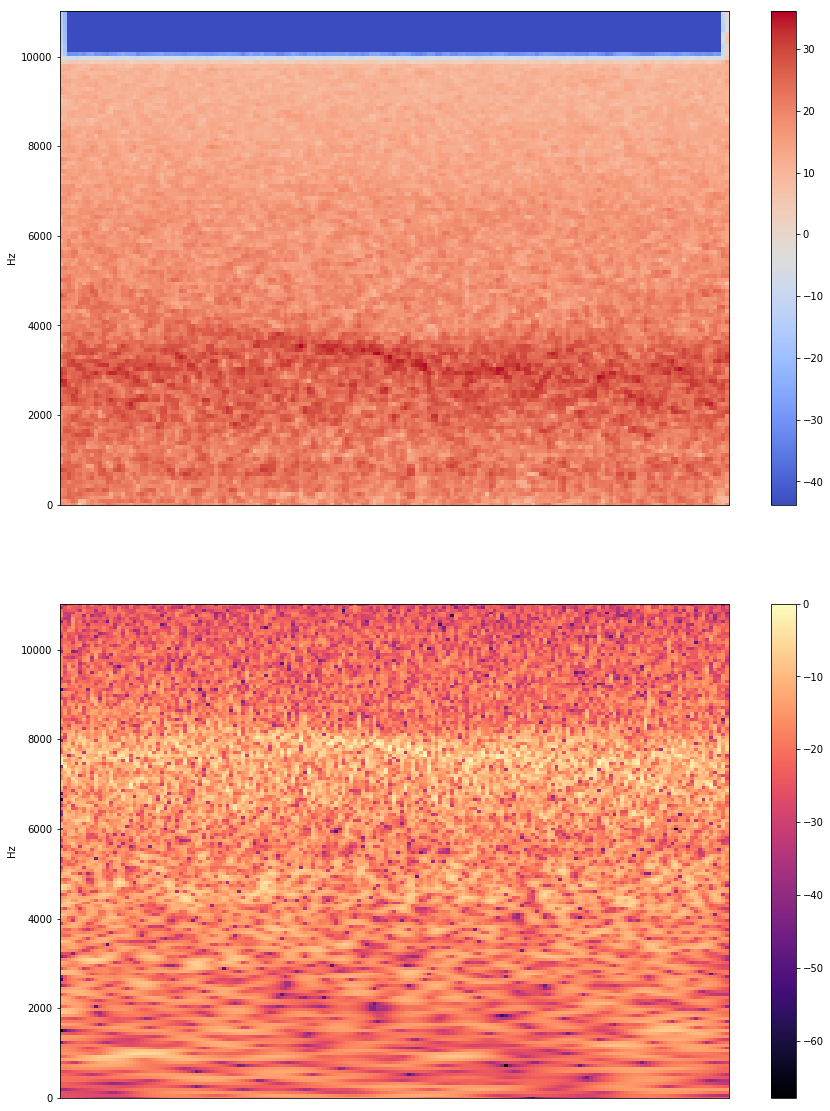

In [516]:
i = 58
X = get_raw(i, train=False)
plt.figure(figsize=(15,20))
plt.subplot(2,1,1)
librosa.display.specshow(librosa.power_to_db(librosa.feature.melspectrogram(X, sr=SAMPLE_RATE)), 
                         y_axis='hz')
plt.colorbar()
plt.subplot(2,1,2)
librosa.display.specshow(mel_spec(X), y_axis='hz')
plt.colorbar()
plt.show()
ipd.Audio(X, rate=SAMPLE_RATE)

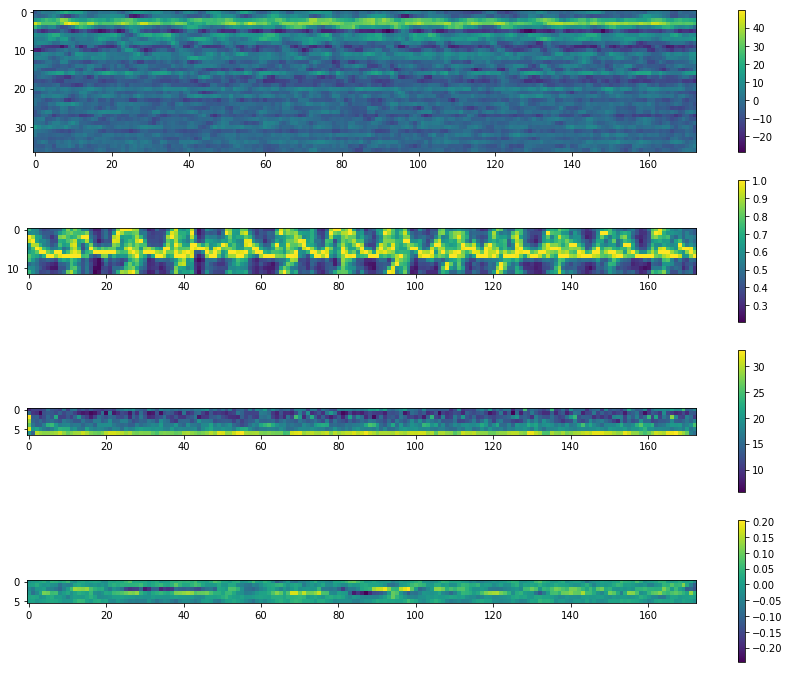

In [515]:
plt.clf()
plt.figure(figsize=(15,12))
stft = np.abs(librosa.stft(X))
plt.subplot(4,1,1)
plt.imshow(librosa.feature.mfcc(y=X, sr=SAMPLE_RATE, n_mfcc=40)[3:])
plt.colorbar()
plt.subplot(4,1,2)
plt.imshow(librosa.feature.chroma_stft(S=stft, sr=SAMPLE_RATE))
plt.colorbar()
plt.subplot(4,1,3)
plt.imshow(librosa.feature.spectral_contrast(S=stft, sr=SAMPLE_RATE))
plt.colorbar()
plt.subplot(4,1,4)
plt.imshow(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=SAMPLE_RATE))
plt.colorbar()
plt.show()

In [586]:
get_t_avg(X_train_mel[:,:40]).shape

(6325, 40)

In [ ]:
clf = LabelSpreading(kernel='knn', gamma=2, n_neighbors=4)
clf is LabelSpreading()